Statistique inférentielle

1.   Estimation

2.   Tests Statisques
3.  Intervalles de confiance


1.   Élément de liste
2.   Élément de liste





# Analyse des Relations Entre Variables en Python

Ce document explore différentes techniques pour analyser les relations entre des variables qualitatives, quantitatives ou mixtes en Python. Il inclut des explications théoriques, des conditions d'application, et des hypothèses statistiques.


In [ ]:
###########################################################################
# Code Analyse des relations entre des variables en Python
###########################################################################

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency, pearsonr, spearmanr, kendalltau, shapiro, levene, ttest_ind, kruskal

## Analyse de la Liaison Entre Deux Variables Qualitatives


Le **test du chi-deux (chi2)** est une méthode statistique permettant de déterminer si deux variables qualitatives sont **indépendantes** ou non.

#### Conditions d'Utilisation :
- Les échantillons doivent être **indépendants**.
- Les effectifs attendus dans chaque case du tableau de contingence doivent être **supérieurs à 5** .

#### Hypothèses du Test :
- **H0 (hypothèse nulle)** : Les deux variables sont **indépendantes**.
- **H1 (hypothèse alternative)** : Les deux variables sont **dépendantes**.

In [ ]:
###########################################################################
# Analyse de la liaison entre deux variables qualitatives
###########################################################################


# Charger les données depuis GitHub
file_path = "https://raw.githubusercontent.com/LeCoinStat/WAS/main/WAS17/data/base_de_donnees_media_sociaux.csv"
data = pd.read_csv(file_path)

data.head()

,ID,Tranche_d_age,Niveau_d_Education,Frequence_Utilisation,Plateforme_Media_Social
0,1,35-44,Master,Rarement,Twitter
1,2,35-44,Master,Très fréquemment,Twitter
2,3,25-34,Bac,Régulièrement,Twitter
3,4,25-34,Master,Rarement,TikTok
4,5,35-44,Doctorat,Occasionnellement,Twitter


 **Y a-t-il un lien entre la tranche d'âge des utilisateurs et leur préférence pour une plateforme de média social ?**


,ID,Tranche_d_age,Niveau_d_Education,Frequence_Utilisation,Plateforme_Media_Social
0,1,35-44,Master,Rarement,Twitter
1,2,35-44,Master,Très fréquemment,Twitter
2,3,25-34,Bac,Régulièrement,Twitter
3,4,25-34,Master,Rarement,TikTok
4,5,35-44,Doctorat,Occasionnellement,Twitter
...,...,...,...,...,...
995,996,35-44,Doctorat,Très fréquemment,Twitter
996,997,45-54,Bac,Régulièrement,Twitter
997,998,35-44,Master,Rarement,LinkedIn
998,999,35-44,Secondaire,Très fréquemment,Facebook


In [ ]:

# Etape 1: Description univariée
age_counts = data['Tranche_d_age'].value_counts()
age_counts



,count
Tranche_d_age,
25-34,204
18-24,203
55 et +,202
35-44,200
45-54,191


In [ ]:
platform_counts = data['Plateforme_Media_Social'].value_counts()
platform_counts

,count
Plateforme_Media_Social,
Twitter,312
Facebook,196
LinkedIn,179
TikTok,163
Instagram,150


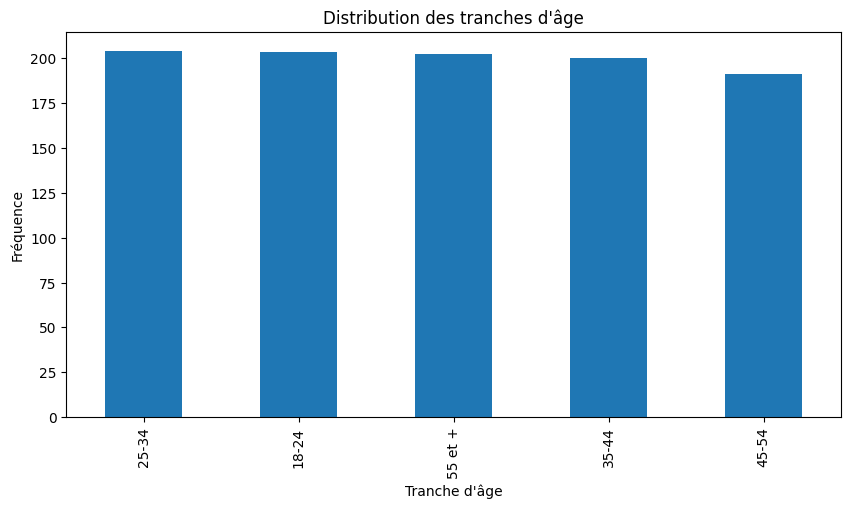

In [ ]:

# Visualisation
plt.figure(figsize=(10, 5))
age_counts.plot(kind='bar', title='Distribution des tranches d\'\u00e2ge')
plt.xlabel('Tranche d\'\u00e2ge')
plt.ylabel('Fréquence')
plt.show()



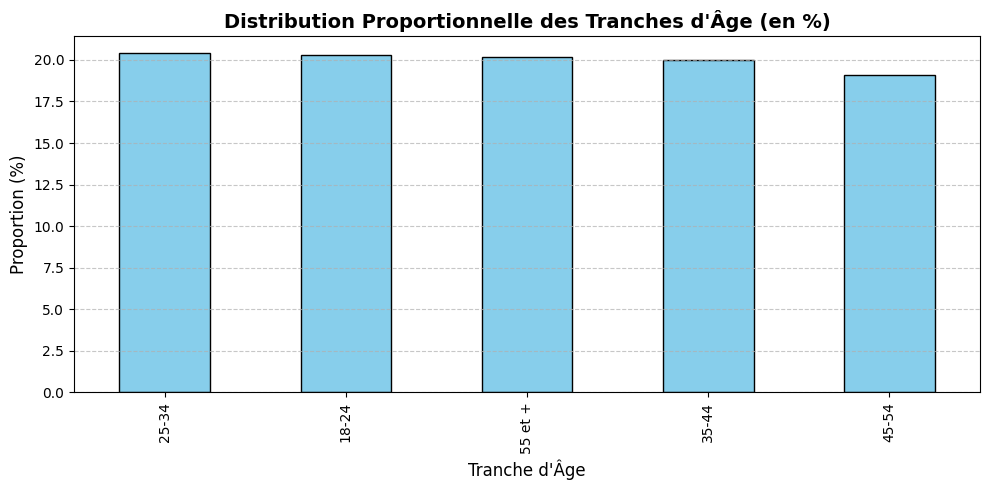

In [ ]:
# Calcul des proportions pour la distribution des tranches d'âge
age_counts = data['Tranche_d_age'].value_counts(normalize=True) * 100  # En pourcentage

# Visualisation en proportion
plt.figure(figsize=(10, 5))
age_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Distribution Proportionnelle des Tranches d'Âge (en %)", fontsize=14, weight='bold')
plt.xlabel("Tranche d'Âge", fontsize=12)
plt.ylabel("Proportion (%)", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Affichage du graphique
plt.show()

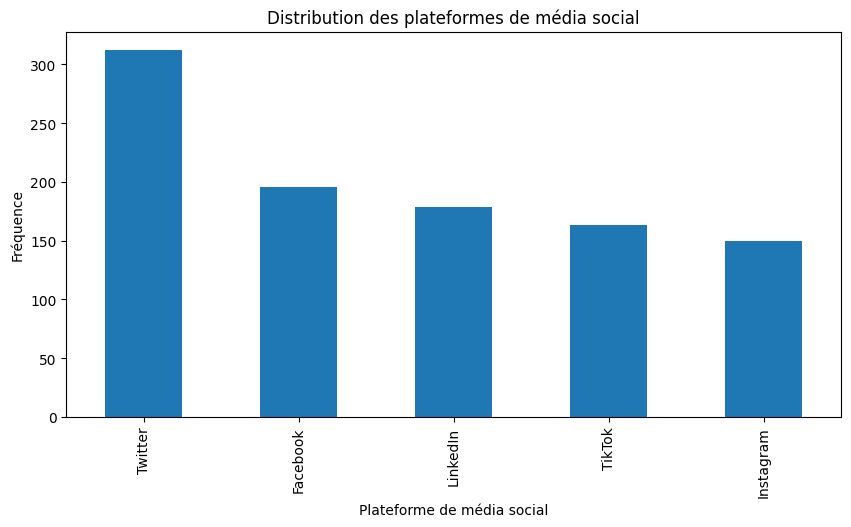

In [ ]:
plt.figure(figsize=(10, 5))
platform_counts.plot(kind='bar', title='Distribution des plateformes de média social')
plt.xlabel('Plateforme de média social')
plt.ylabel('Fréquence')
plt.show()


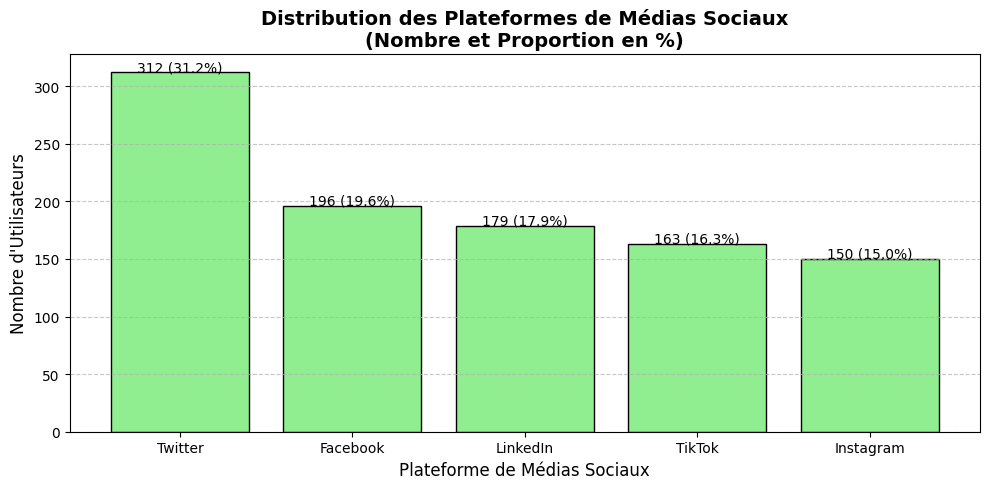

In [ ]:
platform_counts = data['Plateforme_Media_Social'].value_counts()
platform_proportions = platform_counts / platform_counts.sum() * 100

# Visualisation avec annotations au-dessus des barres
plt.figure(figsize=(10, 5))
ax = plt.bar(platform_counts.index, platform_counts.values, color='lightgreen', edgecolor='black')

# Annotation des valeurs au-dessus des barres
for i, bar in enumerate(ax):
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # Position horizontale (centre de la barre)
        bar.get_height() + 1,  # Position verticale (au-dessus de la barre)
        f"{platform_counts.values[i]} ({platform_proportions.values[i]:.1f}%)",  # Texte (nombre et proportion)
        ha='center', fontsize=10
    )

# Titres et étiquettes
plt.title("Distribution des Plateformes de Médias Sociaux\n(Nombre et Proportion en %)", fontsize=14, weight='bold')
plt.xlabel("Plateforme de Médias Sociaux", fontsize=12)
plt.ylabel("Nombre d'Utilisateurs", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Affichage du graphique
plt.show()


In [ ]:

# Etape 2: Description bivariée
contingency_table = pd.crosstab(data['Tranche_d_age'], data['Plateforme_Media_Social'])
print(contingency_table)



Plateforme_Media_Social  Facebook  Instagram  LinkedIn  TikTok  Twitter
Tranche_d_age                                                          
18-24                          13         59        30      67       34
25-34                          27         51        32      57       37
35-44                          55         18        33      13       81
45-54                          52         10        45      11       73
55 et +                        49         12        39      15       87


In [ ]:
# Calcul des proportions pour que chaque tranche d'âge fasse 100%
contingency_table_proportions = contingency_table.div(contingency_table.sum(axis=1), axis=0)
contingency_table_proportions


Plateforme_Media_Social,Facebook,Instagram,LinkedIn,TikTok,Twitter
Tranche_d_age,,,,,
18-24,0.064039,0.290640,0.147783,0.330049,0.167488
25-34,0.132353,0.250000,0.156863,0.279412,0.181373
35-44,0.275000,0.090000,0.165000,0.065000,0.405000
45-54,0.272251,0.052356,0.235602,0.057592,0.382199
55 et +,0.242574,0.059406,0.193069,0.074257,0.430693


<ipython-input-45-ea3400050787>:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(


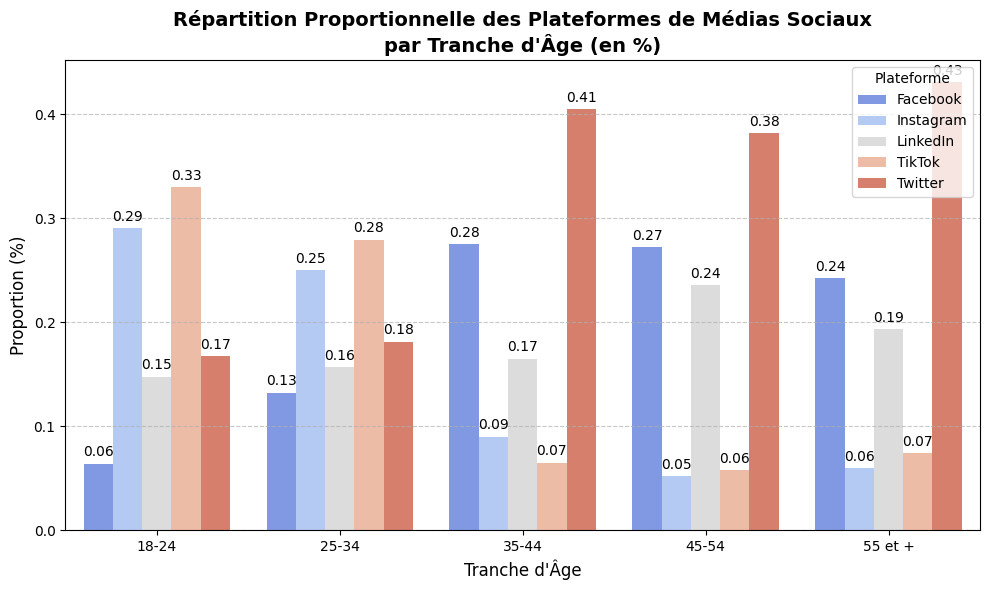

In [ ]:

# Conversion pour un format adapté à seaborn
contingency_table_melted_proportions = contingency_table_proportions.reset_index().melt(
    id_vars='Tranche_d_age', var_name='Plateforme', value_name='Proportion'
)

# Création du barplot avec proportions (100%) et annotations des valeurs
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    data=contingency_table_melted_proportions,
    x='Tranche_d_age',
    y='Proportion',
    hue='Plateforme',
    palette="coolwarm",
    ci=None
)

# Annotation des valeurs sur les barres
for bars in ax.containers:
    ax.bar_label(bars, fmt='%.2f', label_type='edge', fontsize=10, padding=3)

# Titres et légendes
plt.title("Répartition Proportionnelle des Plateformes de Médias Sociaux\npar Tranche d'Âge (en %)", fontsize=14, weight='bold')
plt.xlabel("Tranche d'Âge", fontsize=12)
plt.ylabel("Proportion (%)", fontsize=12)
plt.legend(title="Plateforme", fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Affichage du barplot
plt.show()


In [ ]:
#Etape 3:
# Test de chi-deux
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi2: {chi2}, p-value: {p}")

Chi2: 239.11151593990917, p-value: 8.792740545716681e-42



## Interprétation des Résultats du Test Chi-Deux

- **Si la p-value est inférieure au seuil de significativité (par exemple 0,05)** :  
  On **rejette l'hypothèse nulle** et on conclut qu'il existe une **association significative** entre les deux variables qualitatives.
  
- **Si la p-value est supérieure au seuil** :  
  On ne peut pas rejeter l'hypothèse nulle, ce qui signifie qu'il n'y a **pas suffisamment de preuves** pour conclure à une association entre les variables.


In [ ]:
# Etape 4: Calculer le v-de cramer pour messurer l'intensité de la relation


---

## Étape 4 : Calculer le V de Cramer pour Mesurer l'Intensité de la Relation



- Le **V de Cramer** est une mesure de l'**intensité de l'association** entre deux variables qualitatives.  
- **Valeurs possibles** :  
  - **0** : Absence totale d'association.  
  - **1** : Association parfaite.

### Formule

$$
V = \sqrt{\frac{\chi^2}{n \times (\text{min}(r-1, c-1))}}
$$

**Où** :  
- $(\chi^2$) : La statistique du chi-deux.  
- $(n$) : Le nombre total d'observations.  
- $(r$) : Nombre de lignes dans la table de contingence.  
- $(c$) : Nombre de colonnes dans la table de contingence.  




# Interprétation du V de Cramer

- Un **V de Cramer proche de 0** indique une **faible intensité** de la relation.  
- Un **V de Cramer proche de 1** indique une **relation forte**.  

## Seuils d'Interprétation Courants :

- **0 à 0,1** : Relation négligeable.  
- **0,1 à 0,3** : Relation faible.  
- **0,3 à 0,5** : Relation modérée.  
- **0,5 et plus** : Relation forte.  


In [ ]:
n = contingency_table.sum().sum()
min_dim = min(contingency_table.shape) - 1
cramer_v = np.sqrt(chi2 / (n * min_dim))
print(f"V de Cramer: {cramer_v}")

V de Cramer: 0.2444951512504436


# Analyse de la Corrélation Entre Deux Variables Quantitatives



Les tests de corrélation permettent de mesurer le **degré d'association** entre deux variables quantitatives. Ils répondent à la question : *"Les variations d'une variable sont-elles associées à celles d'une autre ?"*

## Types de Tests  
1. **Corrélation de Pearson** :  
   - Mesure une **association linéaire** entre deux variables.  
   - Utilisée pour des relations strictement **linéaires**.  

2. **Corrélation de Spearman** :  
   - Évalue une **relation monotone** (croissante ou décroissante), même si la relation n'est pas linéaire.  
   - Basée sur les **rangs** des données.  

3. **Corrélation de Kendall** :  
   - Fournit une mesure robuste basée sur les **concordances** et **discordances** dans les rangs des données.  
   - Utile pour les petits échantillons ou les données avec beaucoup d'ex-aequo.  



# Conditions d'Utilisation  

1. **Corrélation de Pearson** :  
   - Les deux variables doivent suivre une **distribution normale** (vérifiable avec le test de Shapiro-Wilk).  
   - Les deux variables doivent avoir une **relation linéaire** (vérifiable avec un scatterplot).  

2. **Corrélation de Spearman et Kendall** :  
   - Aucune condition de normalité ou de linéarité.  
   - Convient pour des données ordinales ou non normales.  



# Hypothèses Statistiques  

- **H0 (hypothèse nulle)** :  
  Il n'y a **aucune corrélation** entre les deux variables.  

- **H1 (hypothèse alternative)** :  
  Une **corrélation existe** entre les deux variables.  

# Interprétation des Tests de Corrélation et de leurs Valeurs

Ce tableau détaille les types de corrélation (Pearson, Spearman, Kendall), leurs descriptions, leurs conditions d'utilisation, ainsi que l'interprétation des valeurs des coefficients.

| **Type de Test**            | **Description**                                                                                              | **Conditions d'Utilisation**                                                                                     | **Interprétation des Valeurs**                                                                                     |
|-----------------------------|----------------------------------------------------------------------------------------------------------|-----------------------------------------------------------------------------------------------------------------|-------------------------------------------------------------------------------------------------------------------|
| Corrélation de Pearson      | Mesure une association linéaire stricte entre deux variables quantitatives.                              | - Normalité des deux variables.<br>- Relation linéaire (vérifiable avec un test de Shapiro-Wilk et un scatterplot). | - **[0, 0.3]** : Association faible.<br>- **[0.3, 0.7]** : Association modérée.<br>- **[0.7, 1]** : Association forte. |
| Corrélation de Spearman     | Mesure une relation monotone (croissante ou décroissante) basée sur les rangs des données.               | - Aucune condition de normalité ou de linéarité.<br>- Convient pour des données ordinales ou non normales.         | - **[0, 0.3]** : Relation monotone faible.<br>- **[0.3, 0.7]** : Relation monotone modérée.<br>- **[0.7, 1]** : Relation monotone forte. |
| Corrélation de Kendall      | Mesure une association robuste basée sur les concordances et discordances dans les rangs des données.   | - Aucune condition de normalité ou de linéarité.<br>- Convient pour des données ordinales ou non normales.         | - **[0, 0.2]** : Association faible.<br>- **[0.2, 0.5]** : Association modérée.<br>- **[0.5, 1]** : Association forte. |


## Détails sur les Hypothèses Statistiques

### Hypothèses (H0 et H1)
- **H0 (hypothèse nulle)** :  
  Il n'y a **aucune corrélation** entre les deux variables.  

- **H1 (hypothèse alternative)** :  
  Une **corrélation existe** entre les deux variables.  




## Résumé des Tests

### Corrélation de Pearson
- **Utilisation** : Relations linéaires strictes.  
- **Conditions** : Données normalement distribuées.  

### Corrélation de Spearman
- **Utilisation** : Relations monotones (croissantes ou décroissantes), même si elles ne sont pas linéaires.  
- **Conditions** : Aucune hypothèse sur la normalité ou la linéarité des données.  

### Corrélation de Kendall
- **Utilisation** : Relations monotones, robustes pour petits échantillons ou données avec beaucoup d'ex-aequo.  
- **Conditions** : Convient pour des données ordinales ou non normales.  

# Interprétation des Tests de Corrélation et de leurs Valeurs

Ce tableau détaille les types de corrélation (Pearson, Spearman, Kendall), leurs descriptions, leurs conditions d'utilisation, ainsi que l'interprétation des valeurs des coefficients.

| **Type de Test**            | **Description**                                                                                              | **Conditions d'Utilisation**                                                                                     | **Interprétation des Valeurs**                                                                                     |
|-----------------------------|----------------------------------------------------------------------------------------------------------|-----------------------------------------------------------------------------------------------------------------|-------------------------------------------------------------------------------------------------------------------|
| Corrélation de Pearson      | Mesure une association linéaire stricte entre deux variables quantitatives.                              | - Normalité des deux variables.<br>- Relation linéaire (vérifiable avec un test de Shapiro-Wilk et un scatterplot). | - **[0, 0.3]** : Association faible.<br>- **[0.3, 0.7]** : Association modérée.<br>- **[0.7, 1]** : Association forte. |
| Corrélation de Spearman     | Mesure une relation monotone (croissante ou décroissante) basée sur les rangs des données.               | - Aucune condition de normalité ou de linéarité.<br>- Convient pour des données ordinales ou non normales.         | - **[0, 0.3]** : Relation monotone faible.<br>- **[0.3, 0.7]** : Relation monotone modérée.<br>- **[0.7, 1]** : Relation monotone forte. |
| Corrélation de Kendall      | Mesure une association robuste basée sur les concordances et discordances dans les rangs des données.   | - Aucune condition de normalité ou de linéarité.<br>- Convient pour des données ordinales ou non normales.         | - **[0, 0.2]** : Association faible.<br>- **[0.2, 0.5]** : Association modérée.<br>- **[0.5, 1]** : Association forte. |

---



# Application en Python

Pour effectuer ces tests en Python, vous pouvez utiliser :  
- La fonction `pearsonr` de la bibliothèque **SciPy** pour la corrélation de Pearson.  
- La fonction `spearmanr` pour la corrélation de Spearman.  
- La fonction `kendalltau` pour la corrélation de Kendall.  



In [ ]:
github_url = "https://raw.githubusercontent.com/LeCoinStat/WAS/main/WAS17/data/data_marketing.csv"
data = pd.read_csv(github_url)
data.head()

,Identifiant,Revenu,Depenses_Publicitaires
0,1,48587.818345,1244.198139
1,2,54113.155527,1618.468940
2,3,47713.998568,1229.205414
3,4,61295.565061,2109.613824
4,5,55105.264179,1587.067938


# Question métier
Le revenu et les dépenses publicitaires sont-ils corrélés ?

In [ ]:
# Etape 1: Analyses descriptives univariées

In [ ]:

# Description univariée
print(data['Revenu'].describe())
print(data['Depenses_Publicitaires'].describe())



count     1000.000000
mean     52344.575852
std       7379.425150
min      31212.789909
25%      47506.394020
50%      52100.058582
75%      57418.503680
max      78182.364293
Name: Revenu, dtype: float64
count    1000.000000
mean     1489.943736
std       489.178737
min        75.726615
25%      1171.903557
50%      1474.712847
75%      1821.287630
max      3210.547304
Name: Depenses_Publicitaires, dtype: float64


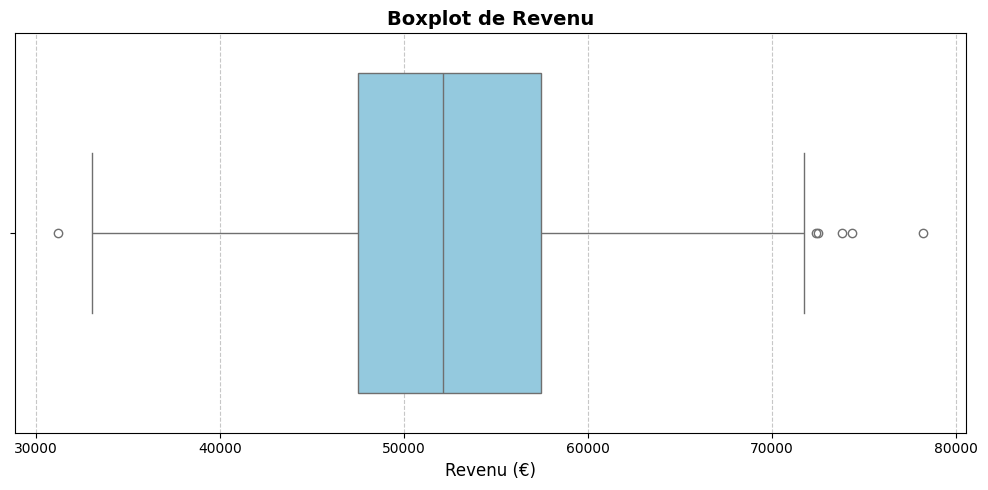

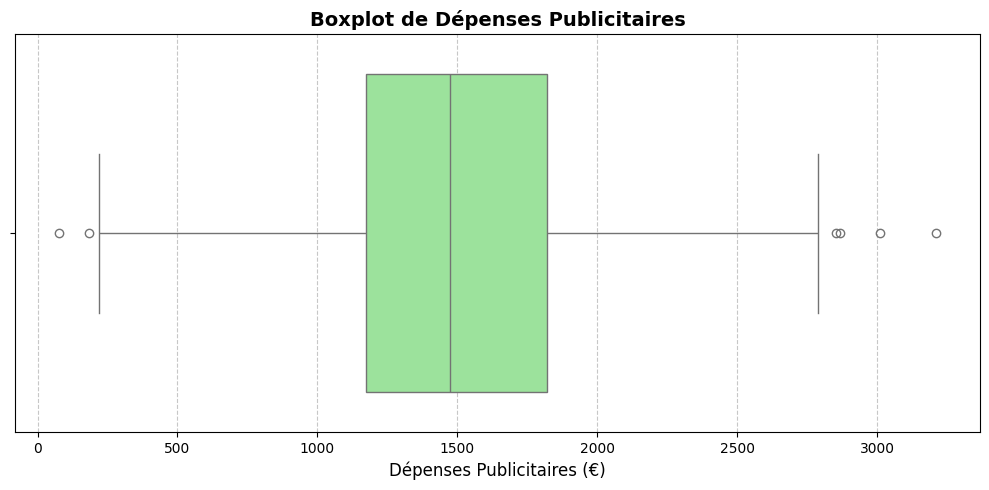

In [ ]:

# Création de boxplots  pour les variables "Revenu" et "Dépenses Publicitaires"
plt.figure(figsize=(10, 5))
sns.boxplot(data=data['Revenu'], orient='h', color='skyblue')
plt.title("Boxplot de Revenu", fontsize=14, weight='bold')
plt.xlabel("Revenu (€)", fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(data=data['Depenses_Publicitaires'], orient='h', color='lightgreen')
plt.title("Boxplot de Dépenses Publicitaires", fontsize=14, weight='bold')
plt.xlabel("Dépenses Publicitaires (€)", fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



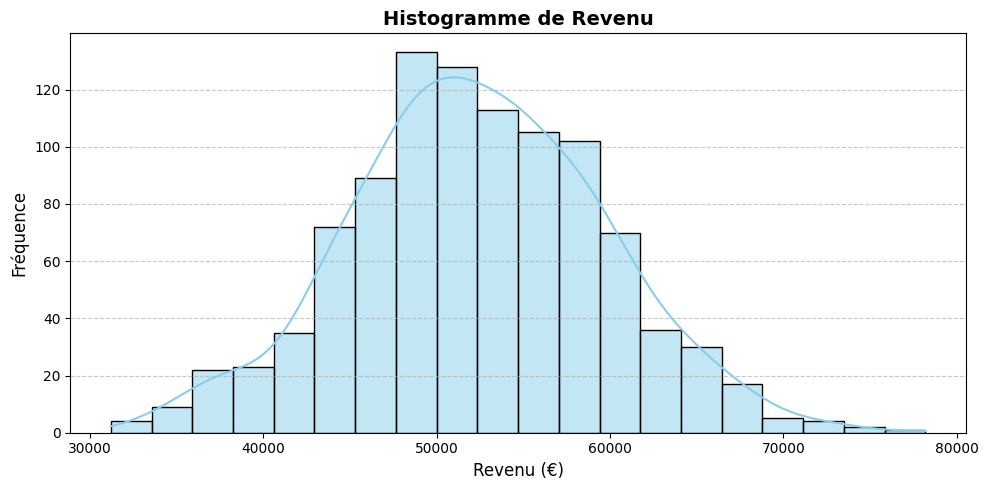

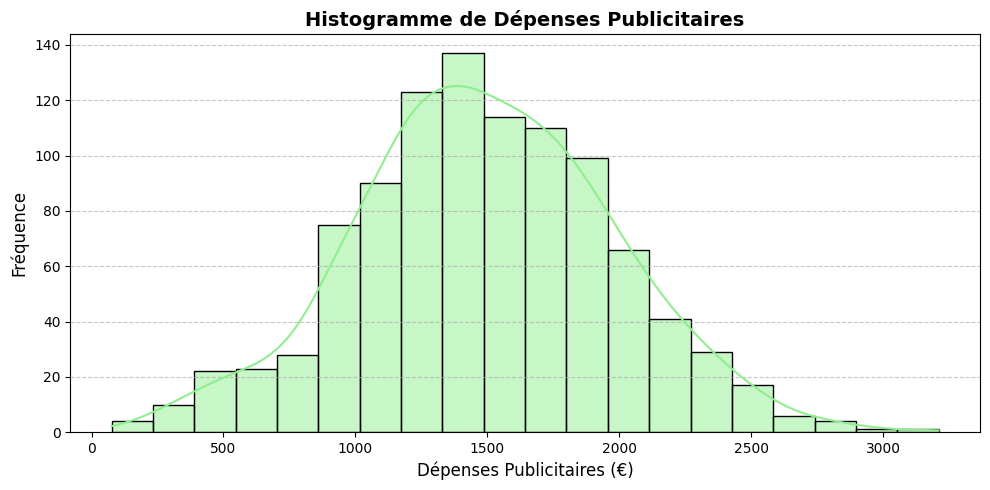

In [ ]:
# Création d'histogrammes pour les variables "Revenu" et "Dépenses Publicitaires"
plt.figure(figsize=(10, 5))
sns.histplot(data['Revenu'], kde=True, color='skyblue', bins=20)
plt.title("Histogramme de Revenu", fontsize=14, weight='bold')
plt.xlabel("Revenu (€)", fontsize=12)
plt.ylabel("Fréquence", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 5))
sns.histplot(data['Depenses_Publicitaires'], kde=True, color='lightgreen', bins=20)
plt.title("Histogramme de Dépenses Publicitaires", fontsize=14, weight='bold')
plt.xlabel("Dépenses Publicitaires (€)", fontsize=12)
plt.ylabel("Fréquence", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


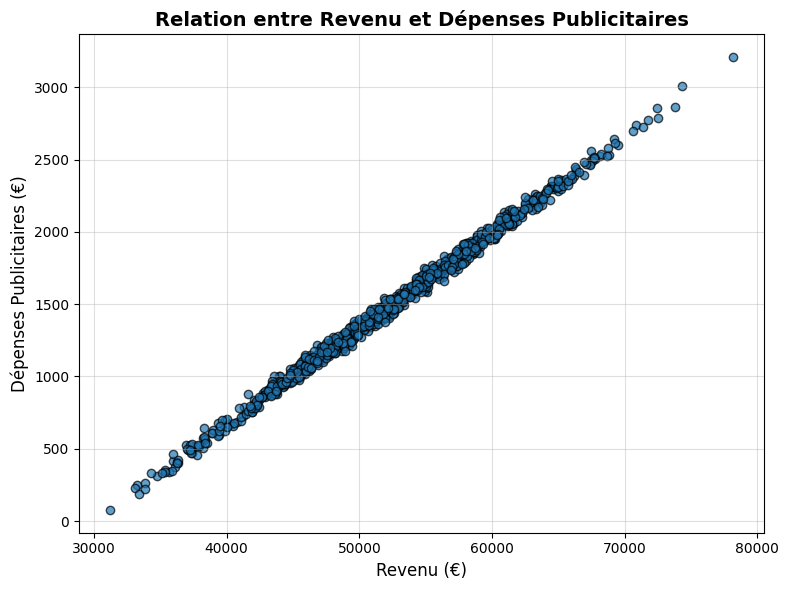

In [ ]:
# Etape 2: Scatter plot pour visualiser la relation
plt.figure(figsize=(8, 6))
plt.scatter(data['Revenu'], data['Depenses_Publicitaires'], alpha=0.7, edgecolors='k')
plt.title("Relation entre Revenu et Dépenses Publicitaires", fontsize=14, weight='bold')
plt.xlabel("Revenu (€)", fontsize=12)
plt.ylabel("Dépenses Publicitaires (€)", fontsize=12)
plt.grid(alpha=0.4)
plt.tight_layout()

plt.show()

In [ ]:
# Etape 3: Corrélation
pearson_corr, _ = pearsonr(data['Revenu'], data['Depenses_Publicitaires'])
spearman_corr, _ = spearmanr(data['Revenu'], data['Depenses_Publicitaires'])
kendall_corr, _ = kendalltau(data['Revenu'], data['Depenses_Publicitaires'])

print(f"Corrélation Pearson: {pearson_corr}")
print(f"Corrélation Spearman: {spearman_corr}")
print(f"Corrélation Kendall: {kendall_corr}")

Corrélation Pearson: 0.9977427745087126
Corrélation Spearman: 0.9973039573039574
Corrélation Kendall: 0.9565845845845846


In [ ]:
# Etape 4: Pvaleur:
# Importation des packages
from scipy.stats import pearsonr, spearmanr, kendalltau

# Calcul
pearson_corr, pval_pearson = pearsonr(data['Revenu'], data['Depenses_Publicitaires'])
spearman_corr, pval_spearman = spearmanr(data['Revenu'], data['Depenses_Publicitaires'])
kendall_corr, pval_kendall = kendalltau(data['Revenu'], data['Depenses_Publicitaires'])

# Affichage des résultats
corr_results = {
    "Méthode": ["Pearson", "Spearman", "Kendall"],
    "Corrélation": [pearson_corr, spearman_corr, kendall_corr],
    "P-valeur": [pval_pearson, pval_spearman, pval_kendall]
}

corr_results

{'Méthode': ['Pearson', 'Spearman', 'Kendall'],
 'Corrélation': [0.9977427745087126, 0.9973039573039574, 0.9565845845845846],
 'P-valeur': [0.0, 0.0, 0.0]}

# Analyse de la Liaison Entre une Variable Qualitative  et une Variable Quantitative


Cette analyse vise à comparer les **moyennes** ou les **médianes** d'une variable quantitative entre différents groupes définis par une variable qualitative.  
Elle permet de vérifier si la variable qualitative influence significativement la variable quantitative.



### Types de Tests

1. **Test t de Student** :  
   - Comparaison des moyennes entre **deux groupes**.  
   - Hypothèse d'égalité des variances entre les groupes.  

2. **Test de Welch** :  
   - Comparaison des moyennes entre **deux groupes**, sans supposer que les variances soient égales.  

3. **Test de Wilcoxon (non paramétrique)** :  
   - Basé sur les **rangs** des données.  
   - Utile lorsque la normalité n'est pas respectée ou lorsque les données contiennent des valeurs aberrantes.  

4. **Test ANOVA (ou ANOVA de Welch)** :  
   - Comparaison des moyennes entre **plus de deux groupes**.  
   - ANOVA classique suppose l'égalité des variances, tandis que l'ANOVA de Welch ne le fait pas.  

5. **Test de Kruskal-Wallis (non paramétrique)** :  
   - Comparaison des médianes entre **plus de deux groupes**, basé sur les rangs.



### Conditions d'Utilisation

1. **Pour les tests paramétriques** (Test t, ANOVA) :  
   - Les données doivent suivre une **distribution normale** (vérifiable avec le test de Shapiro-Wilk).  
   - Homogénéité des variances entre les groupes (vérifiable avec le test de Levene).  

2. **Pour les tests non paramétriques** (Wilcoxon, Kruskal-Wallis) :  
   - Aucune hypothèse sur la normalité ou l'homogénéité des variances n'est nécessaire.  
   - Convient pour des données ordinales ou avec des distributions non normales.  


### Hypothèses Statistiques

- **H0 (hypothèse nulle)** :  
  Il n'y a **aucune différence significative** entre les groupes.  

- **H1 (hypothèse alternative)** :  
  Il existe une **différence significative** entre les groupes.


### Mise en Œuvre en Python

Pour effectuer ces tests, vous pouvez utiliser les bibliothèques suivantes :  
- **Test t de Student ou Welch** :  
  - `scipy.stats.ttest_ind` (paramètre `equal_var=False` pour Welch).  

- **Test de Wilcoxon** :  
  - `scipy.stats.wilcoxon`.  

- **Test ANOVA ou Kruskal-Wallis** :  
  - `scipy.stats.f_oneway` pour ANOVA classique.  
  - `scipy.stats.kruskal` pour Kruskal-Wallis.



## Interprétation des Résultats

1. **Si la p-value est inférieure au seuil de significativité (ex. 0,05)** :  
   - On **rejette l'hypothèse nulle** et on conclut qu'il existe une **différence significative** entre les groupes.  

2. **Si la p-value est supérieure au seuil** :  
   - On **ne rejette pas l'hypothèse nulle**, ce qui signifie qu'il n'y a **pas suffisamment de preuves** pour conclure à une différence significative.




In [ ]:
# Charger les données
github_url = "https://raw.githubusercontent.com/LeCoinStat/WAS/main/WAS17/data/donnees_marketing.csv"
data = pd.read_csv(github_url)
data.head()

,Groupe,Montant_Achat
0,A,137.368863
1,B,111.855746
2,A,175.179328
3,A,166.200388
4,B,206.038162


## Question Métier  
Est-ce que le montant d'achat moyen diffère entre les groupes définis par une variable qualitative ?"*


  

In [ ]:
# Etape 1: Description univariée
# Analyse pour "Groupe"
groupe_counts = data['Groupe'].value_counts()
groupe_proportions = groupe_counts / groupe_counts.sum() * 100
groupe_proportions

,count
Groupe,
A,50.35
B,49.65


In [ ]:
# Etape 2: Boxplot pour visualisation
# Calcul des statistiques descriptives par groupe
statistiques_par_groupe = data.groupby('Groupe')['Montant_Achat'].agg(
    Moyenne='mean',
    Médiane='median',
    Q1=lambda x: x.quantile(0.25),
    Q3=lambda x: x.quantile(0.75),
    Minimum='min',
    Maximum='max'
).reset_index()



# afficher le tableau de manière interactive
from IPython.display import display
display(statistiques_par_groupe)


,Groupe,Moyenne,Médiane,Q1,Q3,Minimum,Maximum
0,A,95.304505,108.742546,39.090646,153.049293,-77.140177,245.122165
1,B,87.071975,92.479816,28.118071,147.388647,-86.311383,257.043024


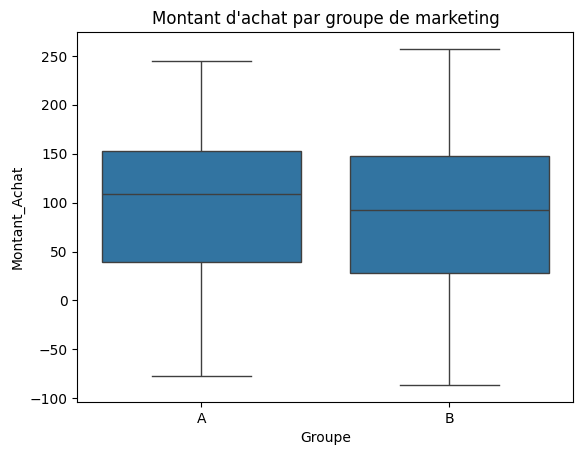

In [ ]:

sns.boxplot(x='Groupe', y='Montant_Achat', data=data)
plt.title('Montant d\'achat par groupe de marketing')
plt.show()

In [ ]:
# Etape 3: Mise en place des tests

In [ ]:

# Test de Student (paramétrique)
group_a = data[data['Groupe'] == 'A']['Montant_Achat']
group_b = data[data['Groupe'] == 'B']['Montant_Achat']

stat, p_value = ttest_ind(group_a, group_b)
print(f"Test de Student - Statistique: {stat}, p-value: {p_value}")


Test de Student - Statistique: 2.687642357306941, p-value: 0.007255540405981321


In [ ]:

# Test de Levene (vérification des variances)
stat, p_value = levene(group_a, group_b)
print(f"Test de Levene - Statistique: {stat}, p-value: {p_value}")


Test de Levene - Statistique: 3.764505169173369, p-value: 0.0524918791041598


In [ ]:
# Test non paramétrique (Wilcoxon)
stat, p_value = kruskal(group_a, group_b)
print(f"Test de Wilcoxon - Statistique: {stat}, p-value: {p_value}")

Test de Wilcoxon - Statistique: 7.125665081126499, p-value: 0.00759882221072976


# Analyse de la Liaison Entre Deux Variables Ordinales


Pour analyser les relations entre deux variables ordinales, on utilise :  
1. **Le test du chi-deux** :  
   - Évalue l'**indépendance** entre deux variables ordinales en comparant les fréquences observées et attendues dans un tableau de contingence.  

2. **Les corrélations ordinales** :  
   - **Corrélation de Spearman** : Mesure une relation monotone (croissante ou décroissante) entre les rangs des variables.  
   - **Corrélation de Kendall** : Mesure l'association basée sur les **concordances** et **discordances** dans les rangs des observations.  


## Types de Tests

1. **Chi-deux** :  
   - Test d'indépendance entre deux variables ordinales.  
   - Hypothèse de départ : les deux variables sont indépendantes.  

2. **Corrélations ordinales (Spearman, Kendall)** :  
   - Mesures d'association qui tiennent compte des **rangs** des données plutôt que des valeurs brutes.  
   - Idéal pour des relations monotones ou non linéaires.  



## Conditions d'Utilisation

1. **Pour le test du chi-deux** :  
   - Les échantillons doivent être **indépendants**.  
   - Les effectifs attendus doivent être supérieurs à **5** dans au moins 80% des cases du tableau de contingence.  

2. **Pour les corrélations ordinales (Spearman, Kendall)** :  
   - Les données doivent être **ordinales** et correctement rangées.  
   - Pas d'hypothèse sur la normalité des données.  


## Hypothèses Statistiques

- **H0 (hypothèse nulle)** :  
  Il n'y a **aucune relation** entre les deux variables ordinales.  

- **H1 (hypothèse alternative)** :  
  Il existe une **relation significative** entre les deux variables ordinales.  

---

## Mise en Œuvre en Python

### Calcul des Tests et Corrélations

1. **Test du chi-deux** :  
   Utilisez la fonction `scipy.stats.chi2_contingency` pour calculer le chi-deux à partir d'un tableau de contingence.

2. **Corrélation de Spearman** :  
   Utilisez la fonction `scipy.stats.spearmanr` pour mesurer l'association monotone.

3. **Corrélation de Kendall** :  
   Utilisez la fonction `scipy.stats.kendalltau` pour mesurer l'association basée sur les rangs.


In [ ]:

# Charger les données
github_url = "https://raw.githubusercontent.com/LeCoinStat/WAS/main/WAS17/data/recommandation_satisfaction.csv"
data = pd.read_csv(github_url)
data.head()

,Identifiant,Niveau_de_Satisfaction,Probabilite_de_Recommandation
0,1,1,1
1,2,1,4
2,3,1,1
3,4,2,2
4,5,2,1


## Question Métier  
Existe-t-il une relation significative entre le niveau de satisfaction des clients et leur probabilité de recommander un produit ?


In [ ]:



# Tableau de contingence
contingency_table = pd.crosstab(data['Niveau_de_Satisfaction'], data['Probabilite_de_Recommandation'])
print(contingency_table)

# Test de chi-deux
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi2: {chi2}, p-value: {p}")




Probabilite_de_Recommandation    1   2   3   4
Niveau_de_Satisfaction                        
1                              122  89  62  38
2                              100  84  50  38
3                               20  42  76  82
4                               12  21  30  44
5                                7  16  22  45
Chi2: 186.92838402140887, p-value: 1.609418296185967e-33
